In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/train_data.csv")

In [5]:
df.head()

,Period Code,Cycle ID,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,...,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,Good/Bad,timestamp
0,1,1,-0.0007,-0.0004,100,518.67,14.62,21.61,1.3,47.47,...,8138.62,8.4195,0.03,392,2388,100,39.06,23.419,0,3/1/2020 0:00
1,1,2,0.0019,-0.0003,100,518.67,14.62,21.61,1.3,47.49,...,8131.49,8.4318,0.03,392,2388,100,39,23.4236,0,3/1/2020 0:05
2,1,3,-0.0043,0.0003,100,518.67,14.62,21.61,1.3,47.27,...,8133.23,8.4178,0.03,390,2388,100,38.95,23.3442,0,3/1/2020 0:10
3,1,4,0.0007,0,100,518.67,14.62,21.61,1.3,47.13,...,8133.83,8.3682,0.03,392,2388,100,38.88,23.3739,0,3/1/2020 0:15
4,1,5,-0.0019,-0.0002,100,518.67,14.62,21.61,1.3,47.28,...,8133.8,8.4294,0.03,393,2388,100,38.9,23.4044,0,3/1/2020 0:20


In [6]:
df.isna().sum()

Period Code    29
Cycle ID       36
B_2            40
B_3            44
B_4            42
B_5            35
B_9            29
B_10           44
B_14           44
B_15           46
B_16           37
B_17           41
B_18           35
B_19           37
B_20           40
B_21           29
B_22           27
B_23           31
B_24           41
B_25           37
Good/Bad       39
timestamp       0
dtype: int64

In [7]:
def convert_to_nan(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return float('NaN')

temp = df.columns.drop(['timestamp'])

for column in temp:
    df[column] = df[column].apply(convert_to_nan)

df.shape

(16504, 22)

In [8]:
df.isna().sum()

Period Code    318
Cycle ID       310
B_2            311
B_3            330
B_4            329
B_5            313
B_9            306
B_10           301
B_14           317
B_15           302
B_16           324
B_17           328
B_18           316
B_19           318
B_20           315
B_21           313
B_22           320
B_23           317
B_24           317
B_25           327
Good/Bad       311
timestamp        0
dtype: int64

In [9]:
from numpy.lib.arraysetops import unique
unique_values = []
k=df.columns
for i in k:
  if i == 'B_4' or i == 'B_5' or i == 'B_9' or i == 'B_10':
    unique_values.append(df[i].unique())

In [10]:
unique_values

[array([100.,  nan]),
 array([518.67,    nan]),
 array([14.62,   nan]),
 array([21.61,   nan, 21.6 ])]

In [11]:
# Filling the null values with mean
mean_col = ["B_2" ,"B_3" , "B_15" , "B_16" , "B_17" , "B_18" , "B_19", "B_21", "B_24", "B_25"]

for col in mean_col:
    mean = df[col].mean()
    df[col].fillna(mean, inplace=True)
df

,Period Code,Cycle ID,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,...,B_18,B_19,B_20,B_21,B_22,B_23,B_24,B_25,Good/Bad,timestamp
0,1.0,1.0,-0.000700,-0.0004,100.0,518.67,14.62,21.61,1.3,47.47,...,8138.62,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190,0.0,3/1/2020 0:00
1,1.0,2.0,0.001900,-0.0003,100.0,518.67,14.62,21.61,1.3,47.49,...,8131.49,8.4318,0.03,392.0,2388.0,100.0,39.00,23.4236,0.0,3/1/2020 0:05
2,1.0,3.0,-0.004300,0.0003,100.0,518.67,14.62,21.61,1.3,47.27,...,8133.23,8.4178,0.03,390.0,2388.0,100.0,38.95,23.3442,0.0,3/1/2020 0:10
3,1.0,4.0,0.000700,0.0000,100.0,518.67,14.62,21.61,1.3,47.13,...,8133.83,8.3682,0.03,392.0,2388.0,100.0,38.88,23.3739,0.0,3/1/2020 0:15
4,1.0,5.0,-0.001900,-0.0002,100.0,518.67,14.62,21.61,1.3,47.28,...,8133.80,8.4294,0.03,393.0,2388.0,100.0,38.90,23.4044,0.0,3/1/2020 0:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16499,82.0,122.0,-0.000100,0.0002,100.0,518.67,14.62,21.61,1.3,47.48,...,8163.51,8.4098,0.03,392.0,2388.0,100.0,38.88,23.3777,0.0,4/27/2020 6:55
16500,82.0,123.0,0.001600,0.0002,100.0,518.67,14.62,21.60,1.3,47.15,...,8153.63,8.3746,0.03,392.0,2388.0,100.0,38.89,23.3542,0.0,4/27/2020 7:00
16501,82.0,124.0,0.000016,-0.0005,100.0,518.67,14.62,21.61,1.3,47.48,...,8162.75,8.4140,0.03,391.0,2388.0,100.0,38.90,23.3692,0.0,4/27/2020 7:05
16502,82.0,125.0,0.000100,-0.0002,100.0,518.67,14.62,21.60,1.3,47.12,...,8150.24,8.4058,0.03,391.0,2388.0,100.0,38.99,23.4025,0.0,4/27/2020 7:10


In [14]:
# Filling the null values with the most common values
common_col = ['B_4', 'B_5', 'B_9', 'B_10',  "B_14", "B_20", "B_22", "B_23"]

for col in common_col:
    common = df[col].unique()[0]
    df[col].fillna(common, inplace=True)

In [13]:
df.isna().sum()

Period Code    318
Cycle ID       310
B_2              0
B_3              0
B_4              0
B_5              0
B_9              0
B_10             0
B_14             0
B_15             0
B_16             0
B_17             0
B_18             0
B_19             0
B_20             0
B_21             0
B_22             0
B_23             0
B_24             0
B_25             0
Good/Bad       311
timestamp        0
dtype: int64

## VISUALIZATION

<ipython-input-15-8948a8653924>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


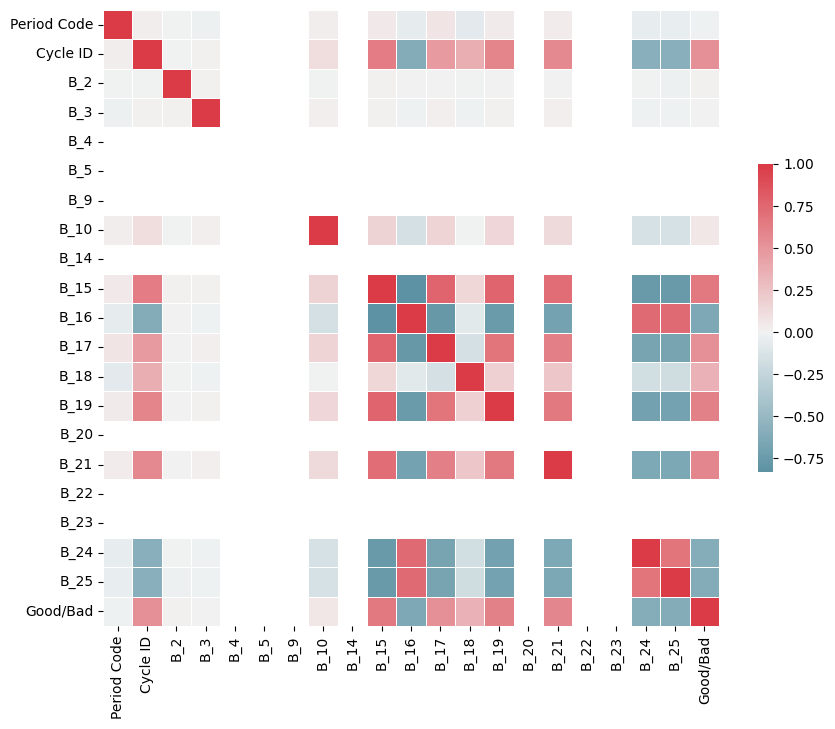

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [16]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%Y %H:%M')
df['timestamp_unix'] = (df['timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [17]:
# Compute the correlation matrix
correlation_matrix = df.corr()

# Get the correlation scores for each feature
feature_scores = correlation_matrix['Good/Bad'].abs().sort_values(ascending=False)

# Print the feature scores
print(feature_scores)

Good/Bad          1.000000
B_15              0.655376
B_16              0.630787
B_19              0.612548
B_25              0.604276
B_24              0.594150
B_21              0.579348
B_17              0.527049
Cycle ID          0.524203
B_18              0.344955
B_10              0.060965
Period Code       0.010924
B_2               0.007321
B_3               0.003230
timestamp_unix    0.003163
B_4                    NaN
B_5                    NaN
B_9                    NaN
B_14                   NaN
B_20                   NaN
B_22                   NaN
B_23                   NaN
Name: Good/Bad, dtype: float64


<ipython-input-17-a175cec5149b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [18]:
class_counts = df['Good/Bad'].value_counts()
class_counts

0.0    13719
1.0     2474
Name: Good/Bad, dtype: int64

In [19]:
majority_class = df[df['Good/Bad'] == 0]
minority_class = df[df['Good/Bad'] == 1]

# Balance data based on number of majority
oversampled_minority = minority_class.sample(len(majority_class), replace=True)
balanced_data = pd.concat([majority_class, oversampled_minority]).reset_index(drop = True)
balanced_data = balanced_data.reset_index(drop = True)
balanced_data
class_counts = balanced_data['Good/Bad'].value_counts()
class_counts

0.0    13719
1.0    13719
Name: Good/Bad, dtype: int64

In [20]:
balanced_data

,Period Code,Cycle ID,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,...,B_19,B_20,B_21,B_22,B_23,B_24,B_25,Good/Bad,timestamp,timestamp_unix
0,1.0,1.0,-0.0007,-0.0004,100.0,518.67,14.62,21.61,1.3,47.470000,...,8.4195,0.03,392.0,2388.0,100.0,39.06,23.4190,0.0,2020-03-01 00:00:00,1583020800
1,1.0,2.0,0.0019,-0.0003,100.0,518.67,14.62,21.61,1.3,47.490000,...,8.4318,0.03,392.0,2388.0,100.0,39.00,23.4236,0.0,2020-03-01 00:05:00,1583021100
2,1.0,3.0,-0.0043,0.0003,100.0,518.67,14.62,21.61,1.3,47.270000,...,8.4178,0.03,390.0,2388.0,100.0,38.95,23.3442,0.0,2020-03-01 00:10:00,1583021400
3,1.0,4.0,0.0007,0.0000,100.0,518.67,14.62,21.61,1.3,47.130000,...,8.3682,0.03,392.0,2388.0,100.0,38.88,23.3739,0.0,2020-03-01 00:15:00,1583021700
4,1.0,5.0,-0.0019,-0.0002,100.0,518.67,14.62,21.61,1.3,47.280000,...,8.4294,0.03,393.0,2388.0,100.0,38.90,23.4044,0.0,2020-03-01 00:20:00,1583022000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27433,47.0,190.0,0.0029,0.0002,100.0,518.67,14.62,21.61,1.3,47.542317,...,8.4962,0.03,394.0,2388.0,100.0,38.65,23.1856,1.0,2020-04-02 02:00:00,1585792800
27434,76.0,210.0,-0.0030,0.0003,100.0,518.67,14.62,21.61,1.3,48.240000,...,8.5253,0.03,396.0,2388.0,100.0,38.50,23.0671,1.0,2020-04-23 08:40:00,1587631200
27435,42.0,185.0,0.0016,0.0002,100.0,518.67,14.62,21.61,1.3,47.880000,...,8.4681,0.03,396.0,2388.0,100.0,38.72,23.1648,1.0,2020-03-29 13:30:00,1585488600
27436,72.0,210.0,0.0000,-0.0002,100.0,518.67,14.62,21.61,1.3,48.230000,...,8.5114,0.03,396.0,2388.0,100.0,38.39,23.0848,1.0,2020-04-20 12:15:00,1587384900


In [21]:
k=list(range(2,19))
k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [22]:
balanced_data.columns

Index(['Period Code', 'Cycle ID', 'B_2', 'B_3', 'B_4', 'B_5', 'B_9', 'B_10',
       'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'B_21', 'B_22',
       'B_23', 'B_24', 'B_25', 'Good/Bad', 'timestamp', 'timestamp_unix'],
      dtype='object')

In [23]:
X = balanced_data.iloc[:,k].values
y = balanced_data.iloc[:,20].values

In [24]:
X

array([[-7.000e-04, -4.000e-04,  1.000e+02, ...,  2.388e+03,  1.000e+02,
         3.906e+01],
       [ 1.900e-03, -3.000e-04,  1.000e+02, ...,  2.388e+03,  1.000e+02,
         3.900e+01],
       [-4.300e-03,  3.000e-04,  1.000e+02, ...,  2.388e+03,  1.000e+02,
         3.895e+01],
       ...,
       [ 1.600e-03,  2.000e-04,  1.000e+02, ...,  2.388e+03,  1.000e+02,
         3.872e+01],
       [ 0.000e+00, -2.000e-04,  1.000e+02, ...,  2.388e+03,  1.000e+02,
         3.839e+01],
       [ 1.500e-03, -2.000e-04,  1.000e+02, ...,  2.388e+03,  1.000e+02,
         3.841e+01]])

In [25]:
y

array([0., 0., 0., ..., 1., 1., 1.])

BALANCED DATASET

In [244]:
from matplotlib import rc_file
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature engineering (you can customize this part based on your dataset)
# You might want to apply some feature scaling or selection techniques here

# Use SMOTE to handle the class imbalance
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


# Hyperparameter tuning with GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2,5,10]
# }
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds (trees)
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of each tree
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight (hessian) needed in a child
     'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition
    # 'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting the trees
    # 'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for fitting the trees
    # 'reg_alpha': [0, 0.1, 0.2],  # L1 regularization term on weights
    # 'reg_lambda': [0, 0.1, 0.2],  # L2 regularization term on weights
}

# Model selection (XGBoost)
# xg = xgb.XGBClassifier()
rf = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3,scoring='recall', n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)


# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='recall', cv=5)
# grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_

best_model = RandomForestClassifier(**best_params)

# model.fit(X_train_resampled, y_train_resampled)
best_model.fit(X_train_resampled, y_train_resampled)



# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Model evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Calculate maintenance costs and business losses
correct_predictions = np.sum(y_test == y_pred)
incorrect_predictions = len(y_test) - correct_predictions

maintenance_cost = (correct_predictions * 30 + incorrect_predictions * 60) * 16000
business_losses = (incorrect_predictions * 60 * 32560) + (incorrect_predictions * 60 * 300) + (incorrect_predictions * 50 * 60)

print("Maintenance cost: $", maintenance_cost)
print("Business losses: $", business_losses)
X_train_resampled.columns

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[[2588  153]
 [  29  469]]
              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97      2741
         1.0       0.75      0.94      0.84       498

    accuracy                           0.94      3239
   macro avg       0.87      0.94      0.90      3239
weighted avg       0.95      0.94      0.95      3239

Maintenance cost: $ 1642080000
Business losses: $ 359377200


Index(['B_2', 'B_3', 'B_4', 'B_5', 'B_9', 'B_10', 'B_14', 'B_15', 'B_16',
       'B_17', 'B_18', 'B_19', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_25'],
      dtype='object')

In [245]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 94.38%


UNBALANCED DATASET

In [246]:
df.shape
df.columns


Index(['Period Code', 'Cycle ID', 'B_2', 'B_3', 'B_4', 'B_5', 'B_9', 'B_10',
       'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'B_21', 'B_22',
       'B_23', 'B_24', 'B_25', 'Good/Bad', 'timestamp', 'timestamp_unix'],
      dtype='object')

In [247]:
df.shape

(16193, 23)

In [248]:
df.dropna(subset=['Good/Bad'], inplace=True)

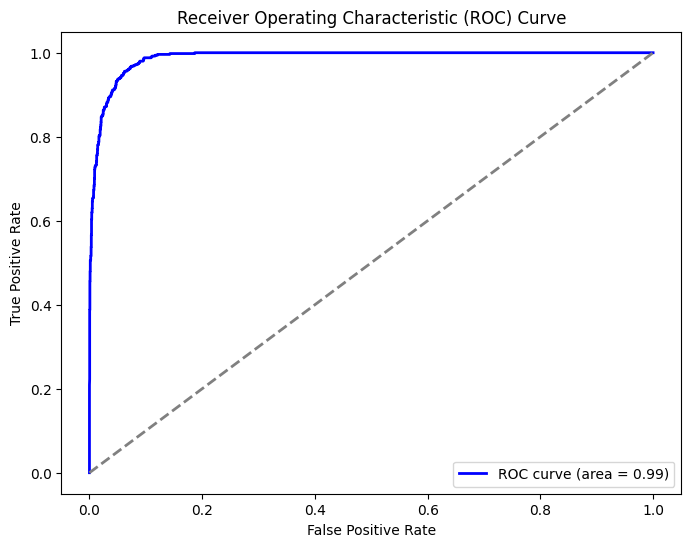

In [249]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier(n_estimators=20)
# model.fit(X_train, y_train)


# Predict probabilities for the test set
probs = best_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [250]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
roc_auc = auc(fpr, tpr)
roc_auc

0.9881730497326775

In [251]:
test_df = pd.read_csv("/content/drive/MyDrive/Datasets/test_data.csv")
test_df.isnull().sum()

Period Code    10
Cycle ID        4
B_2             8
B_3             5
B_4             6
B_5             5
B_9            11
B_10            9
B_14            5
B_15            6
B_16            3
B_17            6
B_18           10
B_19            9
B_20            3
B_21            8
B_22            7
B_23            7
B_24           15
B_25           10
timestamp       0
dtype: int64

In [252]:
test_df.dtypes

Period Code    object
Cycle ID       object
B_2            object
B_3            object
B_4            object
B_5            object
B_9            object
B_10           object
B_14           object
B_15           object
B_16           object
B_17           object
B_18           object
B_19           object
B_20           object
B_21           object
B_22           object
B_23           object
B_24           object
B_25           object
timestamp      object
dtype: object

In [253]:
test_df = test_df.drop(columns=['Period Code','Cycle ID','timestamp'])

In [254]:
test_df.dtypes

B_2     object
B_3     object
B_4     object
B_5     object
B_9     object
B_10    object
B_14    object
B_15    object
B_16    object
B_17    object
B_18    object
B_19    object
B_20    object
B_21    object
B_22    object
B_23    object
B_24    object
B_25    object
dtype: object

In [255]:
columns_to_convert = ['B_2', 'B_3', 'B_4', 'B_5', 'B_9', 'B_10', 'B_14', 'B_15', 'B_16', 'B_17', 'B_18', 'B_19', 'B_20', 'B_21', 'B_22', 'B_23', 'B_24', 'B_25']

# Convert object columns to float
test_df[columns_to_convert] = test_df[columns_to_convert].apply(pd.to_numeric, errors='coerce', downcast='float')

In [256]:
test_df.dtypes
test_df.isnull().sum()

B_2     81
B_3     68
B_4     68
B_5     83
B_9     88
B_10    94
B_14    80
B_15    96
B_16    71
B_17    72
B_18    78
B_19    77
B_20    77
B_21    84
B_22    72
B_23    78
B_24    79
B_25    69
dtype: int64

In [257]:
X_test = pd.read_csv("/content/drive/MyDrive/Datasets/test_data.csv")
# Convert all string values to NaN
def convert_to_nan(value):
    try:
        return float(value)
    except (ValueError, TypeError):
        return float('NaN')

temp = X_test.columns.drop(['timestamp'])

for column in temp:
    X_test[column] = X_test[column].apply(convert_to_nan)


mean_col = ["B_2" ,"B_3" , "B_15" , "B_16" , "B_17" , "B_18" , "B_19", "B_21", "B_24", "B_25"]

for col in mean_col:
    mean = X_test[col].mean()
    X_test[col].fillna(mean, inplace=True)


common_col = ['B_4', 'B_5', 'B_9', 'B_10',  "B_14", "B_20", "B_22", "B_23"]
for col in common_col:
    common = X_test[col].unique()[0]
    X_test[col].fillna(common, inplace=True)


period = X_test.loc[0, 'Period Code']
cycle = X_test.loc[0, 'Cycle ID']
for i in range(len(X_test)):
    current_period = X_test.loc[i, 'Period Code']
    current_cycle = X_test.loc[i, 'Cycle ID']
    if pd.isna(current_period):
        X_test.loc[i, 'Period Code'] = period
    if pd.isna(current_cycle):
        X_test.loc[i, 'Cycle ID'] = cycle
    period = X_test.loc[i, 'Period Code']
    cycle = X_test.loc[i, 'Cycle ID'] + 1
# changing timestamp to time format
X_test['timestamp'] = pd.to_datetime(X_test['timestamp'], format='%m/%d/%Y %H:%M')
X_test['timestamp_unix'] = (X_test['timestamp'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')
# X_test_droped.columns

timeframe = 0
frame_list = [{"timeframe": timeframe}]
for i in range(1, len(X_test)):
    time_diff = X_test.loc[i, 'timestamp_unix'] - X_test.loc[i - 1, 'timestamp_unix']
    timeframe = time_diff
    frame_list.append({"timeframe" : timeframe})
timeframe_data = pd.DataFrame(frame_list)

X_test = pd.concat([X_test, timeframe_data], axis=1)
X_test


X_test_droped = X_test.drop(columns = [ 'Cycle ID', 'Period Code', 'timestamp', 'timeframe','timestamp_unix'], axis=1)
X_test_droped.columns
# X_test.columns
y_pred = best_model.predict(X_test_droped)
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,0
1,0
2,0
3,0
4,0
...,...
4122,1
4123,1
4124,1
4125,1


In [258]:
predictions = best_model.predict(X_test_droped)

In [259]:
test_data['Good/Bad'] = predictions

In [260]:
test_data['Cycle ID'].fillna('nan', inplace=True)

In [261]:
test_data['ID'] = test_data['timestamp'] + '-' + test_data['Cycle ID'].astype(str)

In [262]:
test_data

,Period Code,Cycle ID,B_2,B_3,B_4,B_5,B_9,B_10,B_14,B_15,...,B_19,B_20,B_21,B_22,B_23,B_24,B_25,timestamp,Good/Bad,ID
0,82,127,-0.0014,-0.0003,100,518.67,14.62,21.61,1.3,47.28,...,8.4314,0.03,393,2388,100,39.07,23.28,4/27/2020 7:20,0,4/27/2020 7:20-127
1,82,128,-0.0003,0.0003,100,518.67,14.62,21.61,1.3,47.35,...,8.3897,0.03,391,2388,100,38.8,23.3672,4/27/2020 7:25,0,4/27/2020 7:25-128
2,82,129,-0.002,0,100,518.67,14.62,21.61,1.3,47.2,...,8.4298,0.03,392,2388,100,38.87,23.3531,4/27/2020 7:30,0,4/27/2020 7:30-129
3,82,130,no response,-0.0002,100,518.67,14.62,21.61,1.3,47.4,...,8.4078,0.03,391,stop,100,39.02,23.2821,4/27/2020 7:35,0,4/27/2020 7:35-130
4,82,Bad,-0.0011,0.0003,100,518.67,14.62,21.61,1.3,47.31,...,8.449,0.03,391,2388,100,38.89,23.2888,4/27/2020 7:40,0,4/27/2020 7:40-Bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4122,100,196,-0.0004,-0.0003,100,518.67,14.62,21.61,1.3,48.07,...,8.4956,0.03,397,2388,100,38.49,22.9735,5/11/2020 14:50,1,5/11/2020 14:50-196
4123,100,197,-0.0016,-0.0005,100,518.67,14.62,21.61,1.3,48.04,...,8.5139,0.03,395,2388,100,38.3,23.1594,5/11/2020 14:55,1,5/11/2020 14:55-197
4124,100,198,0.0004,0,100,518.67,14.62,21.61,no response,48.09,...,8.5646,I/O,398,2388,100,38.44,22.9333,5/11/2020 15:00,1,5/11/2020 15:00-198
4125,100,199,-0.0011,0.0003,100,518.67,14.62,21.61,1.3,48.39,...,8.5389,0.03,395,2388,100,38.29,23.064,5/11/2020 15:05,1,5/11/2020 15:05-199


In [263]:
final_data = test_data[['ID','Good/Bad']]

In [264]:
final_data.to_csv('predicted_test_data_8.csv', index=False)